In [27]:
import pandas as pd
import numpy as np
import perfplot

In [28]:
def _setup(n):
    
    df = pd.DataFrame({
        "Column1": np.random.rand(n),
        "Column2": np.random.rand(n),
        "Column3": np.random.rand(n),
    })

    return df

Output()

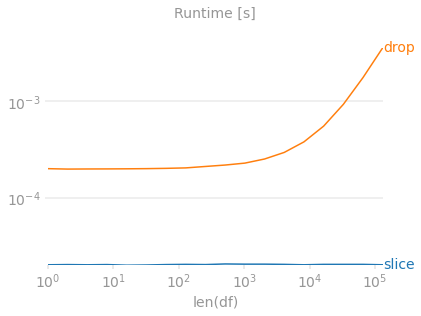

In [31]:
perfplot.show(
    setup=_setup,
    kernels=[
        lambda df: df[1:],
        lambda df: df.drop(df.index[0]),
    ],
    labels=["slice", "drop"],
    n_range=[2 ** k for k in range(18)],
    xlabel="len(df)",
)

Output()

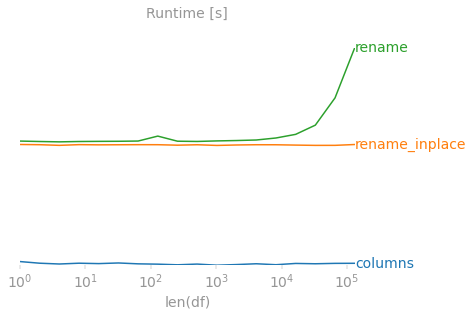

In [35]:
def set_columns(df):
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header

def ren_columns_inplace(df):
    new_header = df.iloc[0]
    df = df[1:]
    df.rename(columns=new_header, inplace=True)

def ren_columns(df):
    new_header = df.iloc[0]
    df = df[1:]
    df = df.rename(columns=new_header)


perfplot.show(
    setup=_setup,
    kernels=[
        lambda df: set_columns(df),
        lambda df: ren_columns_inplace(df),
        lambda df: ren_columns(df),
    ],
    labels=["columns", "rename_inplace", "rename"],
    n_range=[2 ** k for k in range(18)],
    xlabel="len(df)",
    equality_check=None,
)
